Bank Customer Churn Prediction will use three ML models

- Logistic Regression
- SVM
- Random Forest


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [99]:
# load the data
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [100]:
df.shape

(10002, 14)

In [101]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [102]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [103]:
# Rename 'Exiled' column to 'Churn'

df = df.rename(columns={'Exited': 'Churn'})

In [104]:
df.dropna(inplace=True)

In [105]:
df.duplicated().sum()

2

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
# drop customers where balance is 0
# early drop cause data can be skewed and lots of bias

df.drop(df[df['Balance'] == 0].index, inplace=True)

Exploratory Data Analysis (EDA)


Text(0.5, 1.0, 'Churn Count')

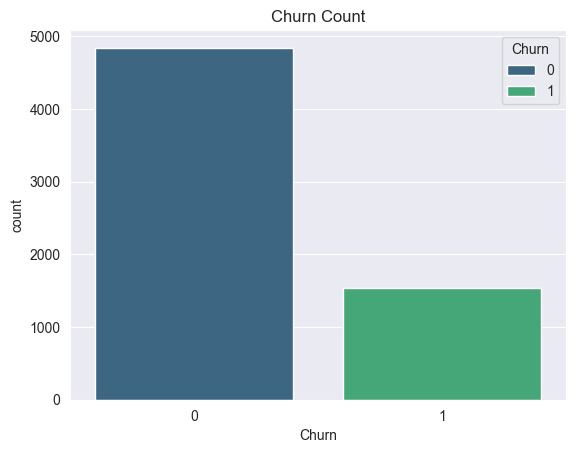

In [108]:
sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn')
plt.title('Churn Count')

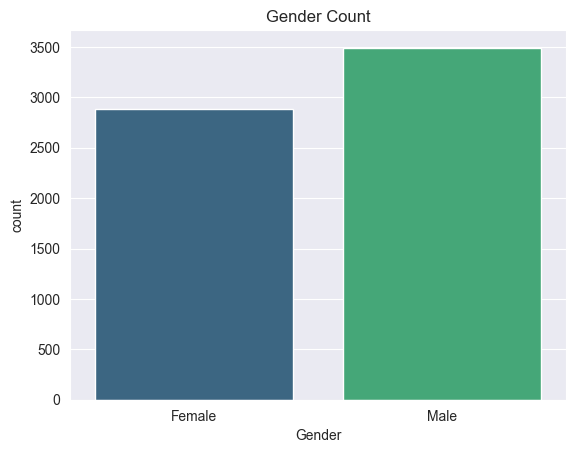

In [109]:
sns.countplot(x='Gender', data=df, palette='viridis', hue='Gender')
plt.title('Gender Count')
plt.show()

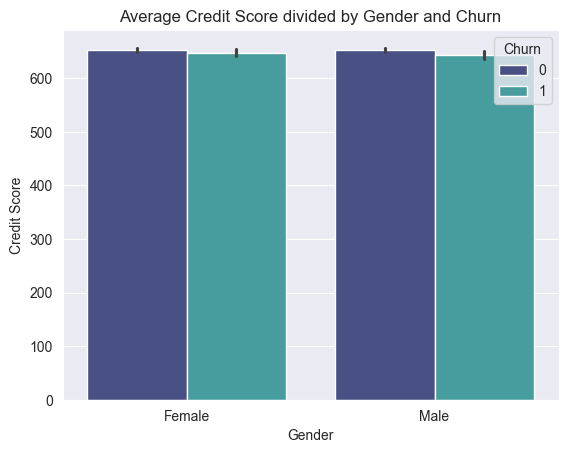

In [110]:
sns.barplot(x='Gender', y='CreditScore', data=df, palette='mako', hue='Churn')
plt.title('Average Credit Score divided by Gender and Churn')
plt.ylabel('Credit Score')
plt.show()

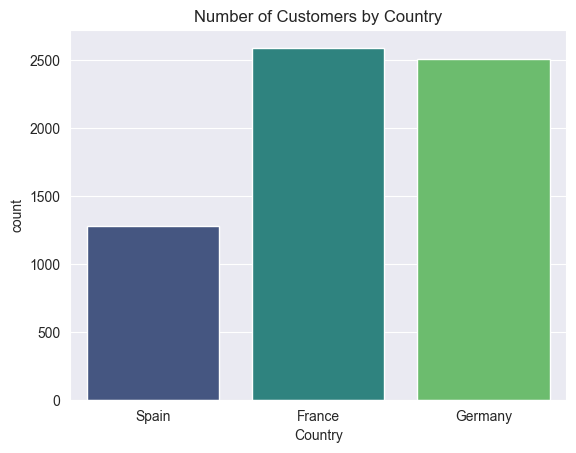

In [111]:
sns.countplot(x='Geography', data=df, palette='viridis', hue='Geography')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.show()

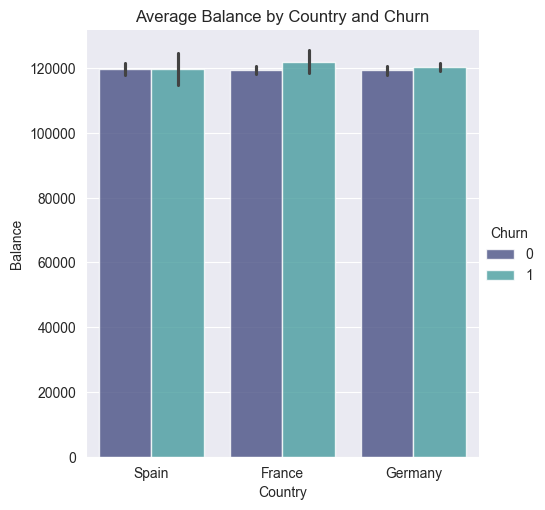

In [112]:
sns.axes_style('whitegrid')
g = sns.catplot(x='Geography', y='Balance', data=df, hue='Churn', kind='bar', palette='mako', alpha=0.8, height=5)
plt.title('Average Balance by Country and Churn')
g.set_axis_labels('Country', 'Balance')
plt.show()

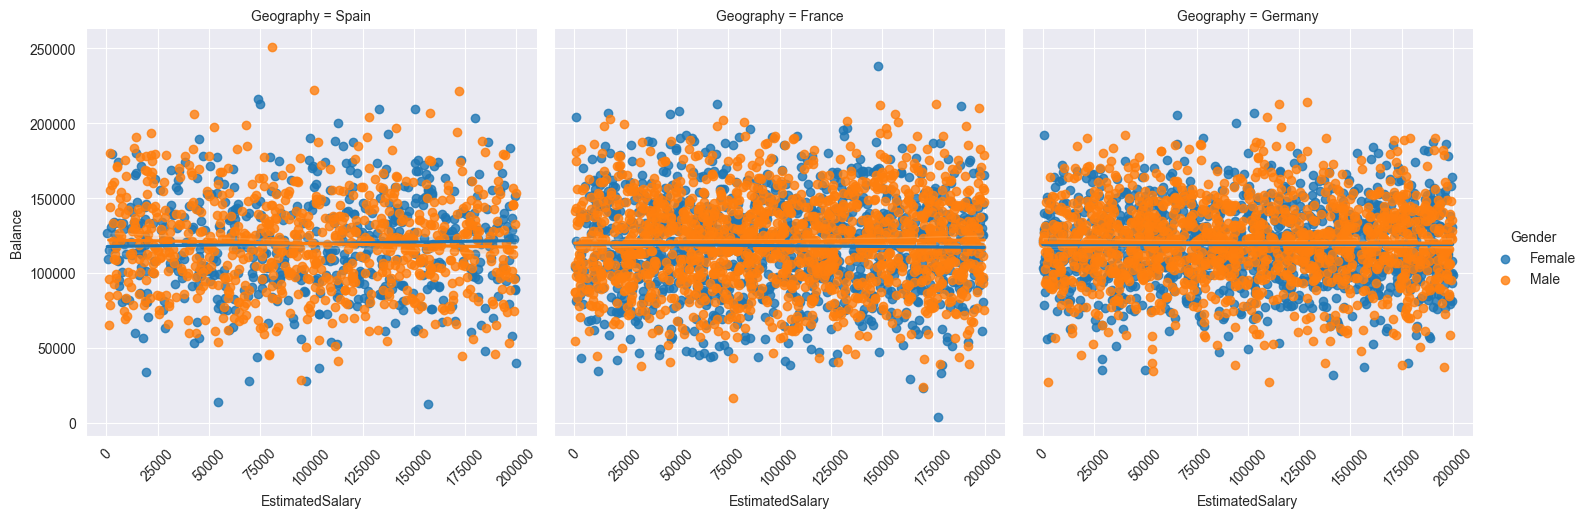

In [113]:
g = sns.lmplot(x='EstimatedSalary', y='Balance', col='Geography', hue='Gender', data=df, height=5)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

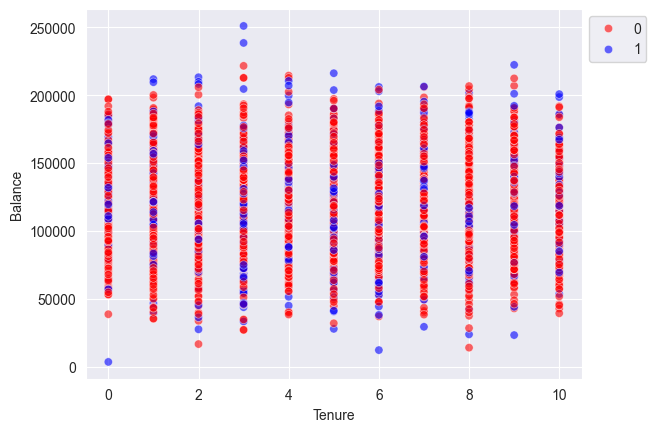

In [114]:
sns.scatterplot(x='Tenure', y='Balance', data=df, hue='Churn', palette=['red', 'blue'], alpha=0.6)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

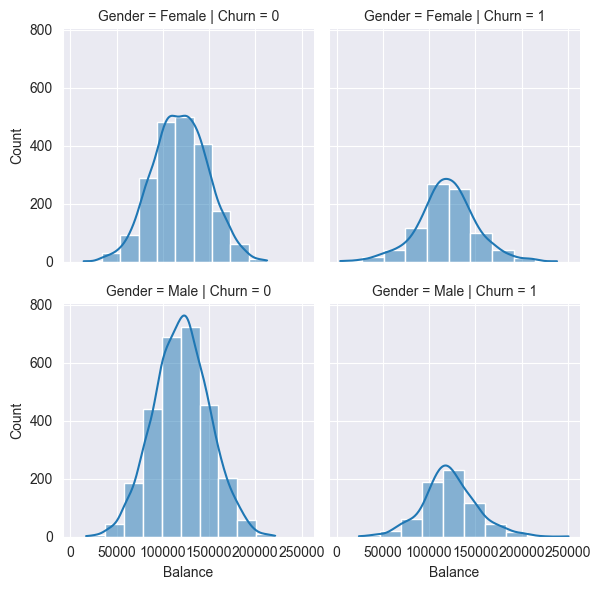

In [115]:
g = sns.FacetGrid(df, col='Churn', row='Gender')
g.map(sns.histplot, 'Balance', bins=10, kde=True)
plt.show()

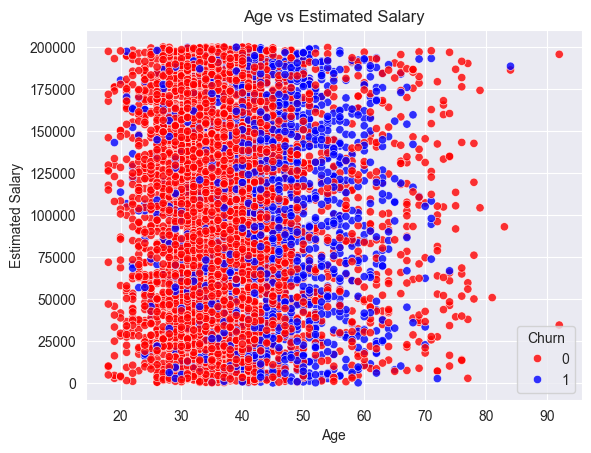

In [116]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, palette=['red', 'blue'], hue='Churn', markers='o', alpha=0.8)
plt.title('Age vs Estimated Salary')
plt.ylabel('Estimated Salary')
plt.show()

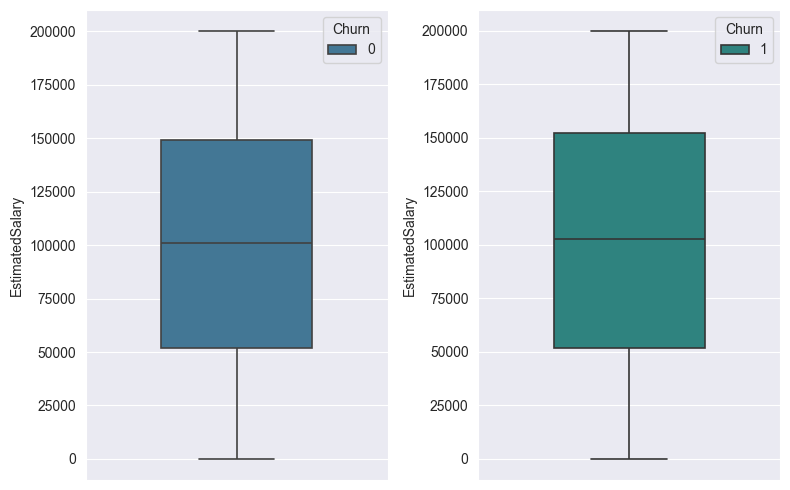

In [117]:
figure, ax = plt.subplots(1, 2, figsize=(8,5))
sns.boxplot(y='EstimatedSalary', data=df[df['Churn'] == 0], hue='Churn', palette='mako', ax=ax[0], width=0.5, linewidth=1.2)

sns.boxplot(y='EstimatedSalary', data=df[df['Churn'] == 1], hue='Churn', palette='viridis', ax=ax[1], width=0.5, linewidth=1.2)
plt.tight_layout()
plt.show()

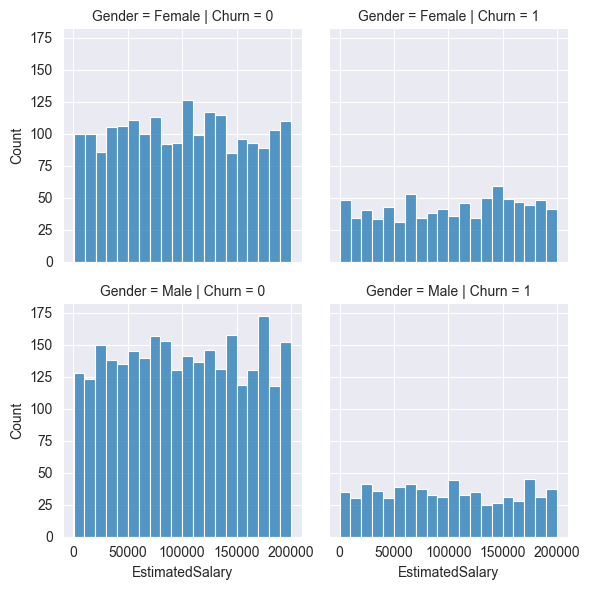

In [118]:
g = sns.FacetGrid(df, col='Churn', row='Gender')
g.map(sns.histplot, 'EstimatedSalary', bins=20)
plt.show()

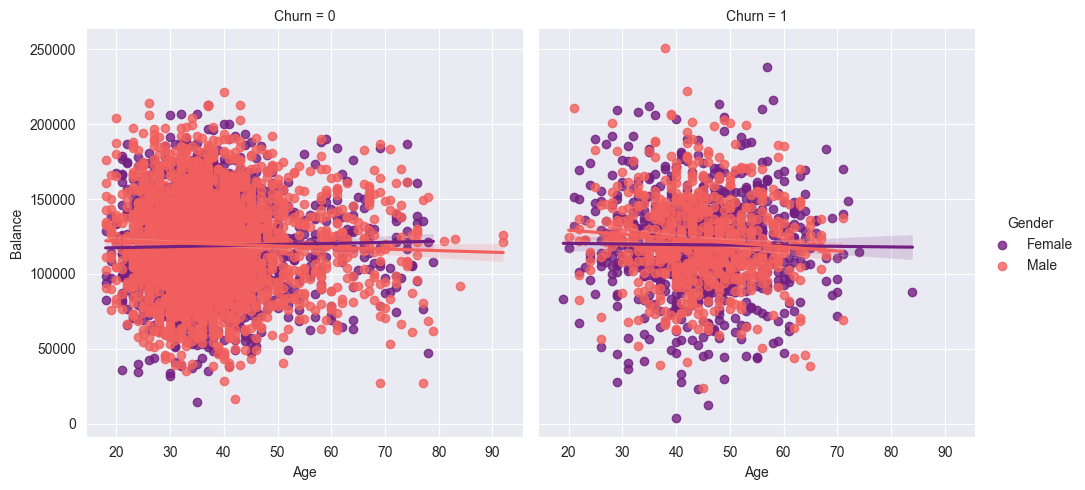

In [119]:
sns.set_style('darkgrid')
sns.lmplot(x='Age', y='Balance', hue='Gender', data=df, col='Churn', palette='magma', height=5)
plt.show()

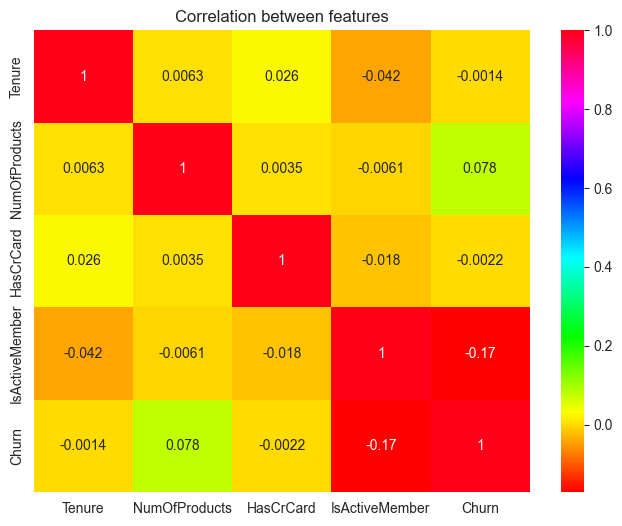

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Churn']].corr(), annot=True, cmap='hsv')
plt.title('Correlation between features')
plt.show()

Data Preprocessing


In [121]:
df['Geography'] = df['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female': 1})

In [122]:
# Grouping age into categories (1-4)
# min age : 18, max age : 92

df['Age'] = df['Age'].astype(int)

bins = [10, 25, 40, 60, 100]
labels = [1, 2, 3, 4]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [123]:
df.drop(['Age', 'Tenure', 'HasCrCard'], axis=1, inplace=True)

In [124]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((4466, 8), (1914, 8))

Logistic Regression


In [125]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_test_pred = Log_reg.predict(X_test)
y_train_pred = Log_reg.predict(X_train)

##### Accuracy Score


In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('----Accuracy Score----')
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

----Accuracy Score----
Accuracy Training : 77.45 %
Accuracy Testing : 76.85 %


##### Confusion Matrix

###### True Positives + True Negatives = Correct Prediction, False Negatives + False Positives = False Prediction


In [128]:
c_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test)
print('True Positives :', c_matrix_test[0][0])
print('False Negatives :', c_matrix_test[0][1])
print('False Positives :', c_matrix_test[1][0])
print('True Negatives :', c_matrix_test[1][1])

Confusion Matrix Testing : 
 [[1355   83]
 [ 360  116]]
True Positives : 1355
False Negatives : 83
False Positives : 360
True Negatives : 116


<Axes: >

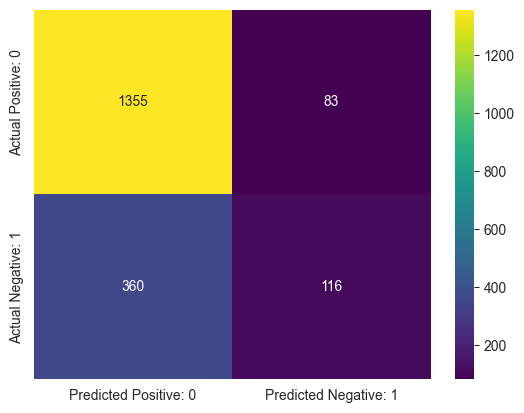

In [129]:
matrix = pd.DataFrame(c_matrix_test, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis')

##### Classification report

###### summarized model metrics divide by churn value (0, 1)


In [130]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1438
           1       0.58      0.24      0.34       476

    accuracy                           0.77      1914
   macro avg       0.69      0.59      0.60      1914
weighted avg       0.74      0.77      0.73      1914



In [131]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('----Precision Score----')
precision = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][0])
print('Precision Score : {:.2f} %'.format(precision * 100))

print('----Recall Score----')
recall = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][1])
print('Recall Score : {:.2f} %'.format(recall * 100))

print('---- f1-score ----')
f1 = 2 * (precision * recall) / (precision + recall)
print('f1 Score : {:.2f} %'.format(f1 * 100))

----Precision Score----
Precision Score : 79.01 %
----Recall Score----
Recall Score : 92.11 %
---- f1-score ----
f1 Score : 85.06 %


SVM


In [132]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [133]:
y_test_pred = SVM.predict(X_test)
y_train_pred = SVM.predict(X_train)

##### Accuracy Score


In [134]:
print('----Accuracy Score----')
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

----Accuracy Score----
Accuracy Training : 82.94 %
Accuracy Testing : 82.81 %


##### Confusion Matrix

###### True Positives + True Negatives = Correct Prediction, False Negatives + False Positives = False Prediction


In [135]:
c_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test)
print('True Positives :', c_matrix_test[0][0])
print('False Negatives :', c_matrix_test[0][1])
print('False Positives :', c_matrix_test[1][0])
print('True Negatives :', c_matrix_test[1][1])

Confusion Matrix Testing : 
 [[1390   48]
 [ 281  195]]
True Positives : 1390
False Negatives : 48
False Positives : 281
True Negatives : 195


<Axes: >

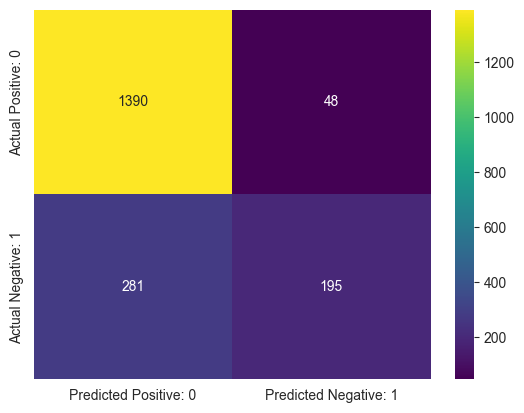

In [136]:
matrix = pd.DataFrame(c_matrix_test, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis')

##### Classification report

###### summarized model metrics divide by churn value (0, 1)


In [137]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1438
           1       0.80      0.41      0.54       476

    accuracy                           0.83      1914
   macro avg       0.82      0.69      0.72      1914
weighted avg       0.82      0.83      0.81      1914



In [138]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('----Precision Score----')
precision = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][0])
print('Precision Score : {:.2f} %'.format(precision * 100))

print('----Recall Score----')
recall = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][1])
print('Recall Score : {:.2f} %'.format(recall * 100))

print('---- f1-score ----')
f1 = 2 * (precision * recall) / (precision + recall)
print('f1 Score : {:.2f} %'.format(f1 * 100))

----Precision Score----
Precision Score : 83.18 %
----Recall Score----
Recall Score : 87.70 %
---- f1-score ----
f1 Score : 85.38 %


Random Forest


In [139]:
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [140]:
y_test_pred = rand_forest.predict(X_test)
y_train_pred = rand_forest.predict(X_train)

##### Accuracy Score


In [141]:
print('----Accuracy Score----')
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

----Accuracy Score----
Accuracy Training : 87.51 %
Accuracy Testing : 82.71 %


##### Confusion Matrix

###### True Positives + True Negatives = Correct Prediction, False Negatives + False Positives = False Prediction


In [142]:
c_matrix_test = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test)
print('True Positives :', c_matrix_test[0][0])
print('False Negatives :', c_matrix_test[0][1])
print('False Positives :', c_matrix_test[1][0])
print('True Negatives :', c_matrix_test[1][1])

Confusion Matrix Testing : 
 [[1373   65]
 [ 266  210]]
True Positives : 1373
False Negatives : 65
False Positives : 266
True Negatives : 210


<Axes: >

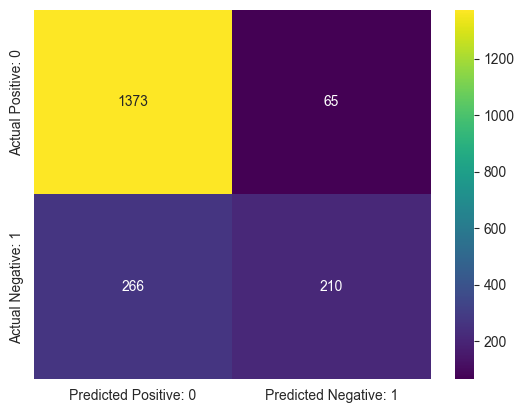

In [143]:
matrix = pd.DataFrame(c_matrix_test, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis')

##### Classification report

###### summarized model metrics divide by churn value (0, 1)


In [144]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1438
           1       0.76      0.44      0.56       476

    accuracy                           0.83      1914
   macro avg       0.80      0.70      0.73      1914
weighted avg       0.82      0.83      0.81      1914



In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('----Precision Score----')
precision = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][0])
print('Precision Score : {:.2f} %'.format(precision * 100))

print('----Recall Score----')
recall = c_matrix_test[0][0] / float(c_matrix_test[0][0] + c_matrix_test[1][1])
print('Recall Score : {:.2f} %'.format(recall * 100))

print('---- f1-score ----')
f1 = 2 * (precision * recall) / (precision + recall)
print('f1 Score : {:.2f} %'.format(f1 * 100))

----Precision Score----
Precision Score : 83.77 %
----Recall Score----
Recall Score : 86.73 %
---- f1-score ----
f1 Score : 85.23 %


##### Overall, Random Forest model achieved the highest accuracy (83.28%) in churn prediction, while logistic regression had the lowest accuracy (76.85%). However, the performance of each model may depending on which dataset used

##### Random Forest : 83.28 %

##### SVM : 82.81 %

##### Logistic Regression : 76.85 %
